In [1]:
import pandas as pd
import numpy as np
import os
import math
from math import exp
import matplotlib.pyplot as plt

#libreria simbólica
from sympy import *

#barycentric
from scipy.interpolate import barycentric_interpolate

#splines
from scipy.interpolate import UnivariateSpline

## FUNCIONES

In [2]:
#funciones
def f1(x):
    return math.sin(x)
def f2(x):
    return (1/(1+25*(x**2)))
def f3(x):
    return exp(-(20*x**2))
def calcula_funcion(e,f):
    x = np.arange(1,len(e)+1)
    if f == 'f1':
        return (x,[f1(p) for p in e])
    if f == 'f2':
        return (x,[f2(p) for p in e])
    if f == 'f3':
        return (x,[f3(p) for p in e])
#creo los espacios
e11 = np.arange(-5,6,1)
e20 = np.arange(1,22,1)
e21 = np.linspace(-5, 5, 21, endpoint=True)

## REPRESENTACIÓN DEL ESPACIO LINEAL

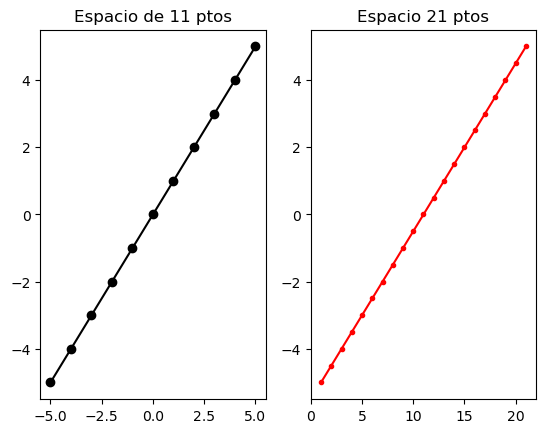

In [3]:
plt.subplot(1, 2, 1)
plt.plot(e11, e11, 'ko-')
plt.title('Espacio de 11 ptos')

plt.subplot(1, 2, 2)
plt.plot(e20, e21, 'r.-')
plt.title('Espacio 21 ptos')

plt.show()

## EVALUACIÓN Y REPRESENTACIÓN DE LAS FUNCIONES

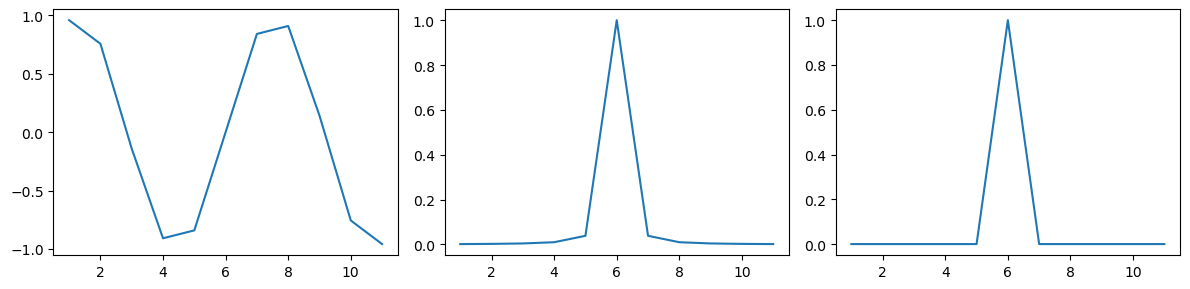

In [4]:
x_1,y_1 = calcula_funcion(e11,'f1')
x_2,y_2 = calcula_funcion(e11,'f2')
x_3,y_3 = calcula_funcion(e11,'f3')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axes[0].plot(x_1, y_1)
axes[1].plot(x_2, y_2)
axes[2].plot(x_3, y_3)

fig.tight_layout()

## POLINOMIOS DE CHEBYSEV

In [7]:
import numpy.polynomial.chebyshev as cheb
y_1_chev = cheb.chebroots(y_1)
y_2_chev = cheb.chebroots(y_2)
try:
    y_3_chev = cheb.chebroots(y_3)
except:
    print('Revisar.....chev 3')

Revisar.....chev 3


Revisar chev...3


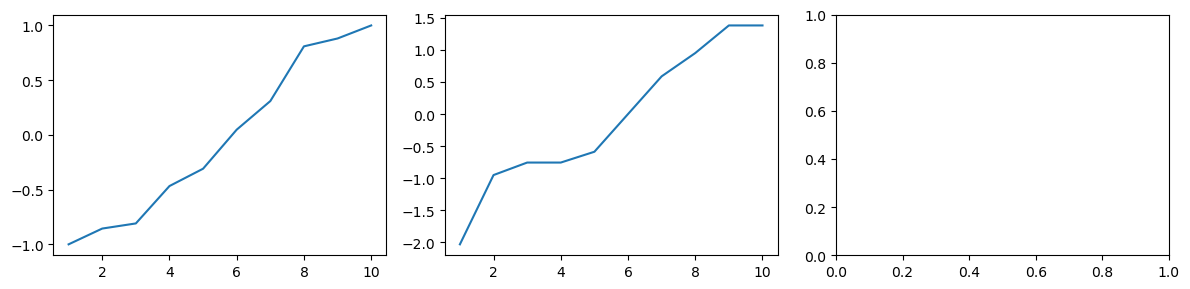

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axes[0].plot(x_1[:-1], y_1_chev)
axes[1].plot(x_2[:-1], y_2_chev)
try:
    axes[2].plot(x_3[:-1], y_3_chev)
except:
    print('Revisar chev...3')

fig.tight_layout()

In [9]:
t11 = cheb.Chebyshev(1,[-5,5])
xp_ch = t11.roots()

t11 = cheb.Chebyshev(y_1)
xp_ch = t11.roots()

## BARYCENTRIC INTERPOLATION Y LAGRANGE

In [10]:
def barycentric_interpolation(x1,y1,n):
    x_observed = x1
    y_observed = y1
    x = np.linspace(min(x_observed), max(x_observed), num=n)
    y = barycentric_interpolate(x_observed, y_observed, x)
    plt.plot(x_observed, y_observed, "o", label="observation")
    plt.plot(x, y, label="barycentric interpolation")
    plt.legend()
    plt.show()
    return x,y

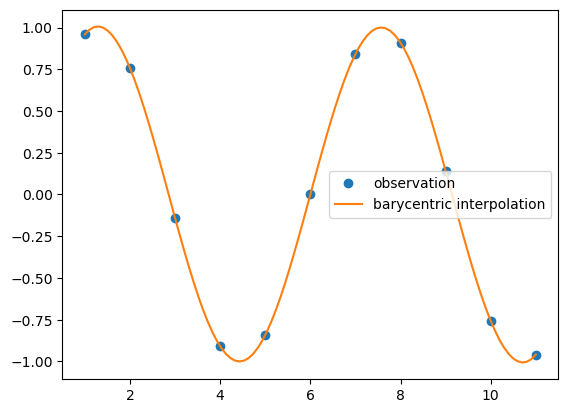

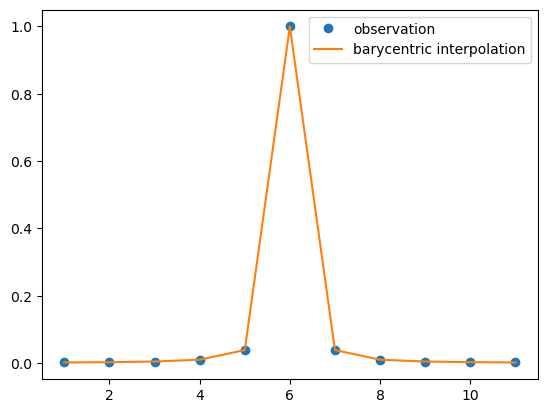

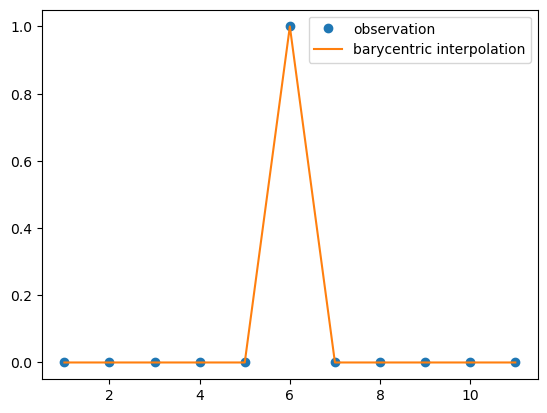

In [11]:
_,_ = barycentric_interpolation(x_1,y_1,100)
_,_ = barycentric_interpolation(x_2,y_2,11)
_,_ = barycentric_interpolation(x_3,y_3,11)

## LAGRANGE INTERPOLATION

In [12]:
x=Symbol("x")
def polinimioL(xi,fi):
    polinomio=0
    for i in range(len(xi)):
        numerador=1
        denominador=1
        for j in range(len(xi)):
            if j!=i:
                numerador*=(x-xi[j])
                denominador*=(xi[i]-xi[j])
        terminoL = numerador/denominador
        polinomio+=terminoL*fi[i]
    return polinomio


def valores(xi,fi,n):
    polinomio=polinimioL(xi,fi)
    poli_simpli=polinomio.expand()
    px=lambdify(x,poli_simpli)
    muestras=n
    a,b,=min(xi),max(xi)
    pxi=np.linspace(a,b,muestras)
    pfi=px(pxi)
    return pxi,pfi,polinomio,poli_simpli
	
def grafica(xi,fi,pxi,pfi):
    plt.subplots(figsize=(15,8))
    plt.plot(xi,fi,"o",label="Puntos")
    plt.plot(pxi,pfi,label="Polinomio")
    plt.legend()
    plt.grid(1)
    plt.xlabel("xi")
    plt.ylabel("yi")
    plt.title("Interpolación de Lagrange")

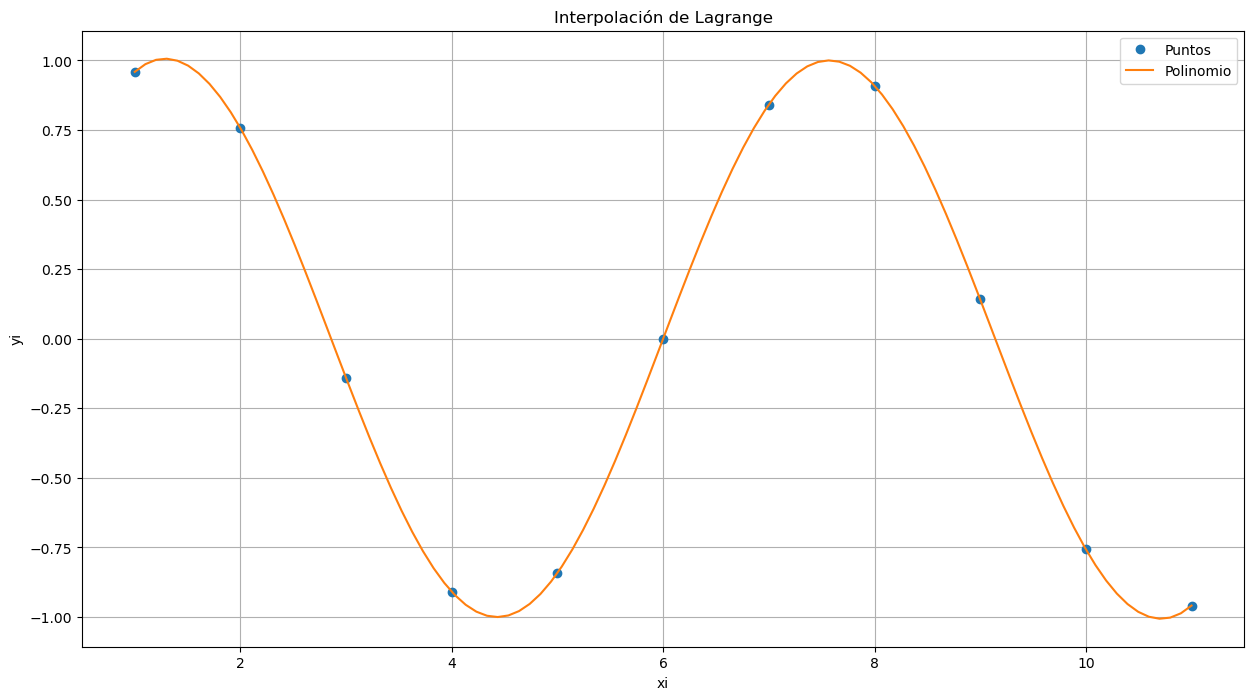

In [13]:
xi =x_1
fi=y_1
pxi,pfi,polinomio,poli_simpli = valores(xi,fi,100)
grafica(xi,fi,pxi,pfi)

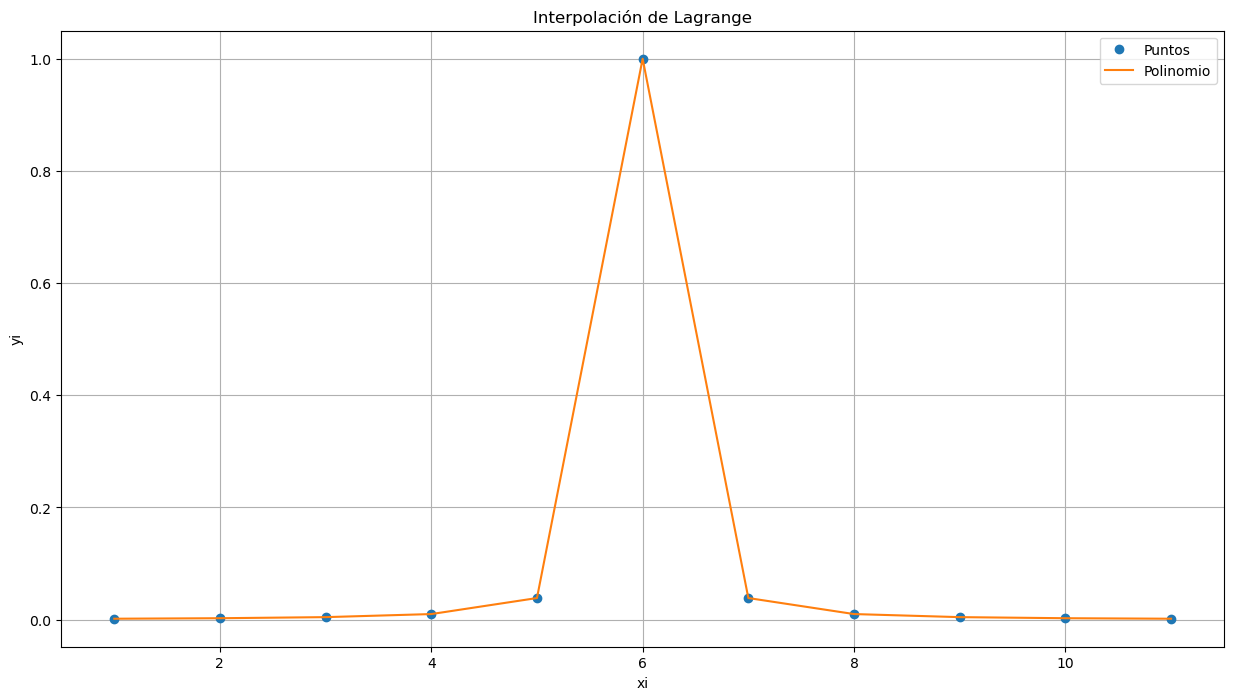

In [14]:
xi =x_2
fi=y_2
pxi,pfi,polinomio,poli_simpli = valores(xi,fi,11)
grafica(xi,fi,pxi,pfi)

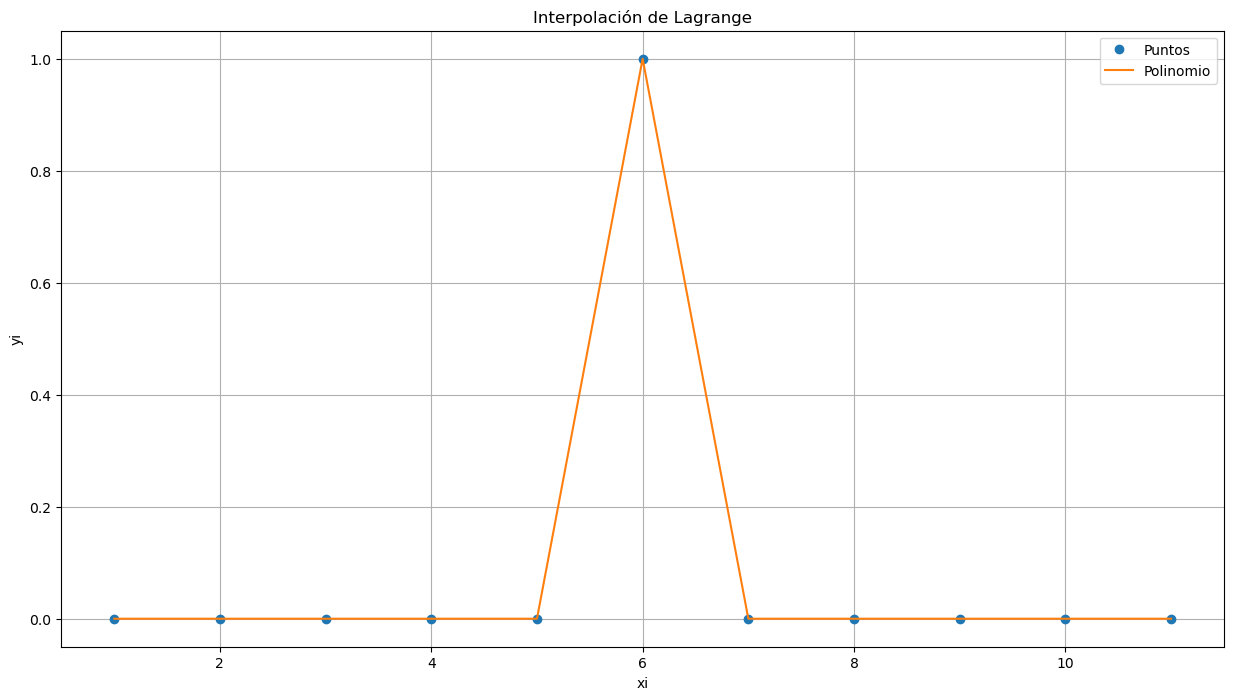

In [15]:
xi =x_3
fi=y_3
pxi,pfi,polinomio,poli_simpli = valores(xi,fi,11)
grafica(xi,fi,pxi,pfi)

## SPLINES

In [16]:
def spline_interpolation(x,y):
    x_observed = x
    y_observed = y
    #x = np.linspace(min(x_observed), max(x_observed), num=n)
    spl = UnivariateSpline(x, y)
    y = spl(x)
    plt.plot(x_observed, y_observed, "o", label="observation")
    plt.plot(x, y, label="Univariate Spline interpolation")
    plt.legend()
    plt.show()

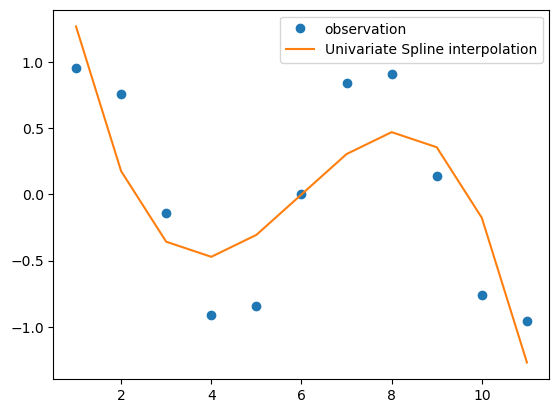

In [17]:
spline_interpolation(x_1,y_1)

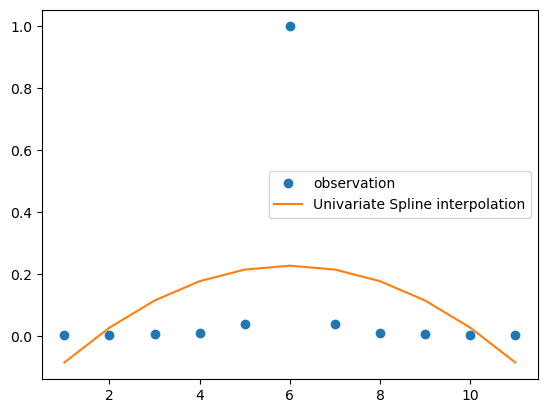

In [18]:
spline_interpolation(x_2,y_2)

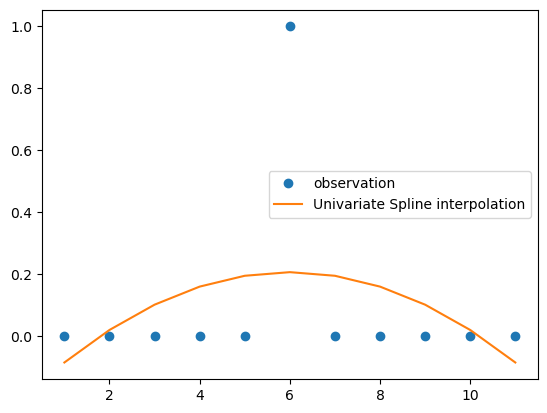

In [19]:
spline_interpolation(x_3,y_3)

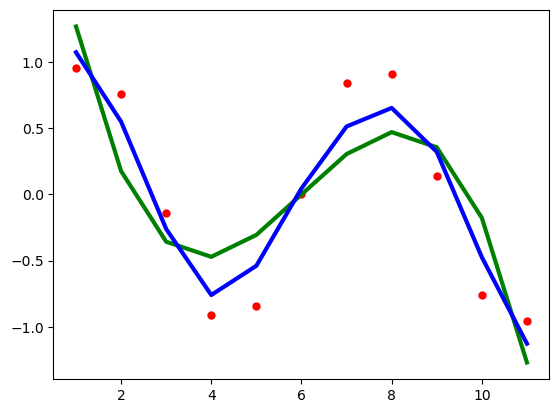

In [20]:
x = x_1
y = y_1
plt.plot(x, y, 'ro', ms=5)

spl = UnivariateSpline(x, y)
xs = x_1
plt.plot(xs, spl(xs), 'g', lw=3)

spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.show()